In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [8]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

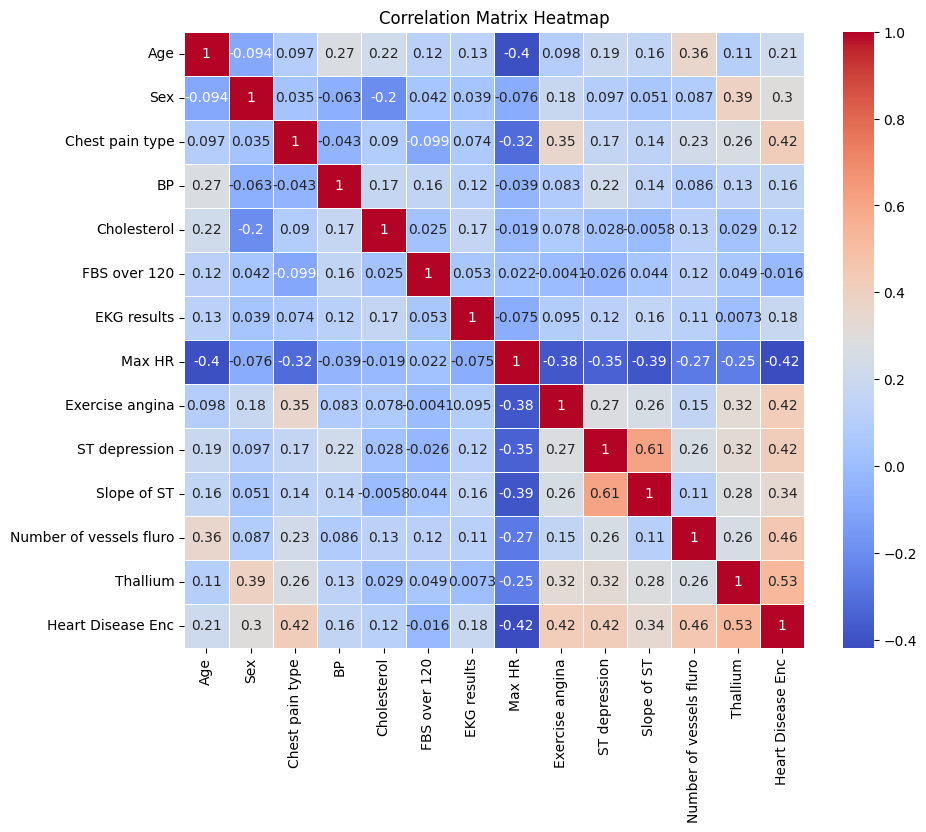

In [ ]:
# df['target'] = data.target
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
corr = df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease Enc']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:

continuous_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
categorical_columns = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

scaler = StandardScaler()
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

imputer = SimpleImputer(strategy='mean')
data[continuous_columns] = imputer.fit_transform(data[continuous_columns])


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [10]:
X = data[continuous_columns + categorical_columns].iloc[:,:-1]
y = data['Heart Disease']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Using Sklearn**

In [12]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Evaluate the model
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.9259259259259259
Confusion Matrix:
[[32  1]
 [ 3 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



### **Without Using Sklearn**

In [14]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [30]:
n_epochs = 1000
alpha = 0.01
m = np.zeros(X.shape[1])
b = 0.0
N = X.shape[0]
epsilon = 1e-15

In [31]:
def get_sigmoid(z):
  return 1/(1+np.exp(-z))

In [32]:
# y_pred = m*x + b
for i in range(n_epochs):
    cost = 0.0
    for j in range(X_train.shape[0]):
        y_pred = get_sigmoid(np.sum(m*X_train[j])+b)
        loss = -y_train[j]*(np.log(y_pred+epsilon)) - (1-y_train[j])*(np.log((1-y_pred)+epsilon))
        m_grad = (y_pred-y_train[j])*X_train[j]
        b_grad = (y_pred-y_train[j])
        cost += loss
        m -= alpha*m_grad
        b -= alpha*b_grad
    print(f'Epoch:{i+1}, Cost: {np.sum(cost)/N} \n\n')

Epoch:1, Cost: 0.4746851456705956 


Epoch:2, Cost: 0.4024051224910501 


Epoch:3, Cost: 0.3768169939070661 


Epoch:4, Cost: 0.36306844868709126 


Epoch:5, Cost: 0.3540919440563897 


Epoch:6, Cost: 0.34756773740842545 


Epoch:7, Cost: 0.3425025515233316 


Epoch:8, Cost: 0.33839366888878336 


Epoch:9, Cost: 0.33495564808785605 


Epoch:10, Cost: 0.33201221303783984 


Epoch:11, Cost: 0.3294473272099737 


Epoch:12, Cost: 0.32718071384856623 


Epoch:13, Cost: 0.3251546069667606 


Epoch:14, Cost: 0.32332610818455376 


Epoch:15, Cost: 0.32166253607992346 


Epoch:16, Cost: 0.32013846531037715 


Epoch:17, Cost: 0.31873376701823003 


Epoch:18, Cost: 0.31743226804910907 


Epoch:19, Cost: 0.31622080703568944 


Epoch:20, Cost: 0.3150885534516552 


Epoch:21, Cost: 0.31402650599481113 


Epoch:22, Cost: 0.3130271163835593 


Epoch:23, Cost: 0.3120840028160448 


Epoch:24, Cost: 0.31119172877820384 


Epoch:25, Cost: 0.3103456302871879 


Epoch:26, Cost: 0.3095416795658012 


Epoch:2

In [34]:
# Predict using the logistic model
y_train_pred = get_sigmoid(np.dot(X_train, m) + b)
y_test_pred = get_sigmoid(np.dot(X_test, m) + b)

# Threshold the predictions to get binary outcomes
y_train_pred_class = (y_train_pred > 0.5).astype(int)
y_test_pred_class = (y_test_pred > 0.5).astype(int)

# Calculate accuracy and confusion matrix
accuracy_train = accuracy_score(y_train, y_train_pred_class)
accuracy_test = accuracy_score(y_test, y_test_pred_class)
conf_matrix_train = confusion_matrix(y_train, y_train_pred_class)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_class)

print(f'Final weights: {m}')
print(f'Final bias: {b}')
print(f'Training Accuracy: {accuracy_train}')
print(f'Testing Accuracy: {accuracy_test}')
print(f'Training Confusion Matrix:\n{conf_matrix_train}')
print(f'Testing Confusion Matrix:\n{conf_matrix_test}')

Final weights: [-0.11091618  0.4858077   0.29155752 -0.21271371  0.51723462  1.5042284
  0.70199786 -1.05494441  0.04878718  0.79866226  0.63060181  0.98400785
  0.58242817]
Final bias: -4.580133603393383
Training Accuracy: 0.8425925925925926
Testing Accuracy: 0.9074074074074074
Training Confusion Matrix:
[[102  15]
 [ 19  80]]
Testing Confusion Matrix:
[[31  2]
 [ 3 18]]
